# Video Game Sales EDA

Before we create a predictive model, let's see what is inside our data.
I will take the same approach to EDA as always, split it up into sections for Univariate, Bivariate, and Multivariate.

## Questions for Analysis

- What are the top 10 selling games for each platform?
- What are some of the differences between the Sales Markets?
- What dummy variables can we create?
- How can we view relative sales?

In [50]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from __future__ import division

df = pd.read_csv("./vgsales.csv")
print "Shape of Dataframe: " + str(df.shape)

Shape of Dataframe: (16598, 11)


In [2]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Univariate

Let's take a look at our platforms and the number of entries for each.

In [3]:
def plot_bar(data, column_name, title):
    data[[column_name, "Rank"]]\
    .groupby(column_name)\
    .count()\
    .plot.bar(by=column_name, title=title)

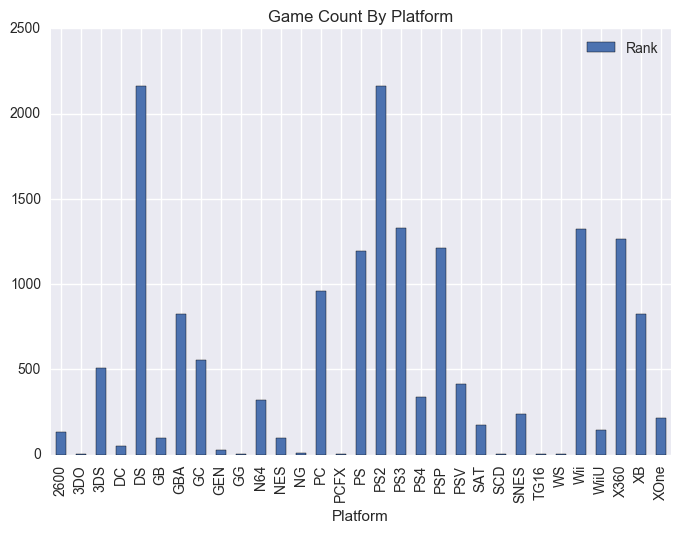

In [4]:
plot_bar(df, "Platform", "Game Count By Platform")

Our plot above gives us an idea of how many games per console our data contains but I immediately noticed that our platforms include handhelds, consoles, and the PC. Lets group these and see what our distribution looks like.

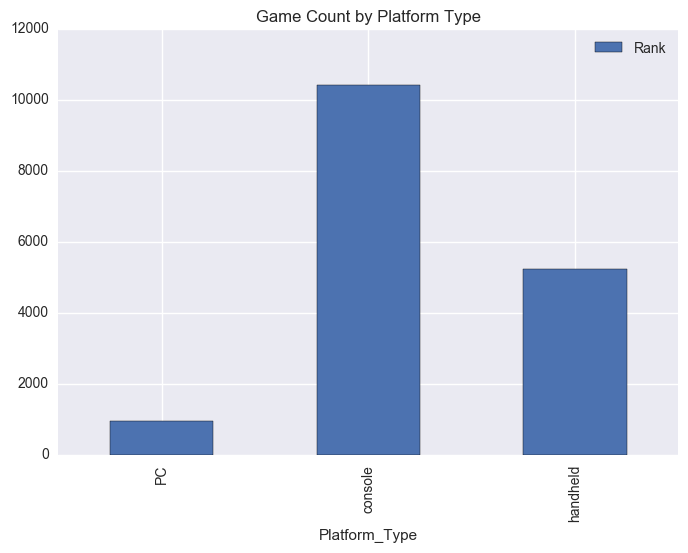

In [5]:
# creating a dictionary to map console to console type
platform_type = {
 'Wii' : "console", 'NES' : "console", 'GB' : "handheld", 'DS' : "handheld", 'X360' : "console",
 'PS3' : "console", 'PS2' : "console", 'SNES' : "console", 'GBA' : "handheld", '3DS' : "handheld",
 'PS4' : "console", 'N64' : "console", 'PS' : "console", 'XB' : "console", 'PC': "PC", '2600': "console",
 'PSP' : "handheld", 'XOne' : "console", 'GC' : "console", 'WiiU' : "console", 'GEN': "console",
 'DC': "console", 'PSV': "handheld", 'SAT': "console", 'SCD' : "console", 'WS' : "handheld",
 'NG' : "console", 'TG16': "console", '3DO': "console", 'GG': "handheld", 'PCFX': "console"
}

df["Platform_Type"] = df["Platform"].map(lambda x: platform_type[x])
plot_bar(df, "Platform_Type", "Game Count by Platform Type")

We can see that there are about ~9,500 more console games than PC releases in our data; we will see later how these compare in sales figures.

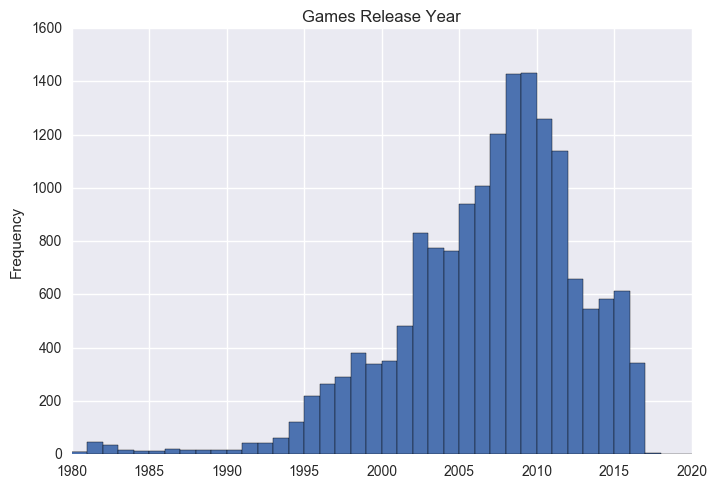

In [6]:
number_of_bins = int(df.Year.max() - df.Year.min())
title = "Games Release Year"

df["Year"].plot.hist(bins = number_of_bins, title=title)

It looks like our data has left skew, indicating that there are more game releases in recent history ~(2001 - 2010)

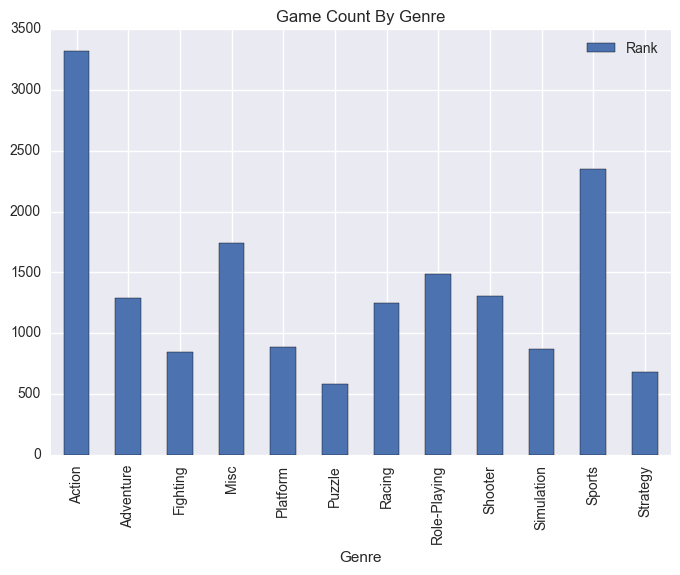

In [7]:
plot_bar(df, "Genre", "Game Count By Genre")

It looks like Action games appear the most but I am not sure who or how a Genre is decided. Would a game like "Legend of Zelda: Ocarina of Time" be Action, Adventure, or Role-Playing"? (fyi- most Zelda games are labeled as Action with some marked as Adventure)

In [8]:
df[df.Name.str.contains("Zelda")].sort_values(by="Year")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Type
127,128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51,console
251,252,Zelda II: The Adventure of Link,NES,1987.0,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38,console
231,232,The Legend of Zelda: A Link to the Past,SNES,1991.0,Action,Nintendo,2.42,0.91,1.15,0.13,4.61,console
318,319,The Legend of Zelda: Link's Awakening,GB,1992.0,Action,Nintendo,2.21,0.96,0.54,0.13,3.83,handheld
94,95,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,4.10,1.89,1.45,0.16,7.60,console
728,730,The Legend of Zelda: Link's Awakening DX,GB,1998.0,Adventure,Nintendo,1.00,0.63,0.45,0.13,2.22,handheld
398,399,The Legend of Zelda: Majora's Mask,N64,2000.0,Action,Nintendo,1.90,0.67,0.73,0.06,3.36,console
923,925,The Legend of Zelda: Oracle of Seasons,GB,2001.0,Adventure,Nintendo,0.87,0.52,0.41,0.06,1.86,handheld
894,896,The Legend of Zelda: Oracle of Ages,GB,2001.0,Action,Nintendo,0.92,0.53,0.41,0.06,1.92,handheld
232,233,The Legend of Zelda: The Wind Waker,GC,2002.0,Action,Nintendo,2.60,0.99,0.89,0.13,4.60,console


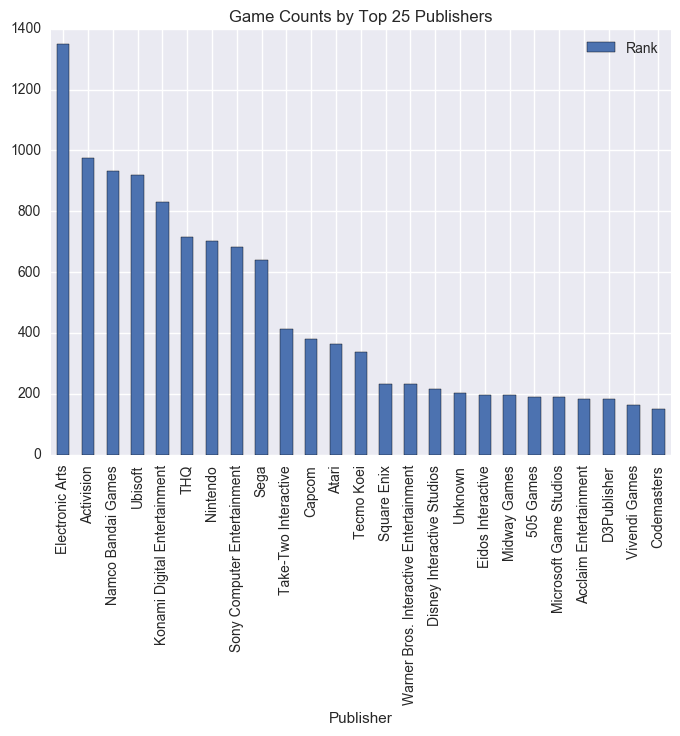

In [9]:
top_publishers = df[["Publisher", "Rank"]].groupby("Publisher").count().sort_values("Rank", ascending=False).head(25)
top_publishers.plot.bar(title="Game Counts by Top 25 Publishers")

I guess it is no surprise that Electronic Arts (EA) has the most game releases; without looking at our data I am guessing this is due to the sports games it releases for all consoles each year...

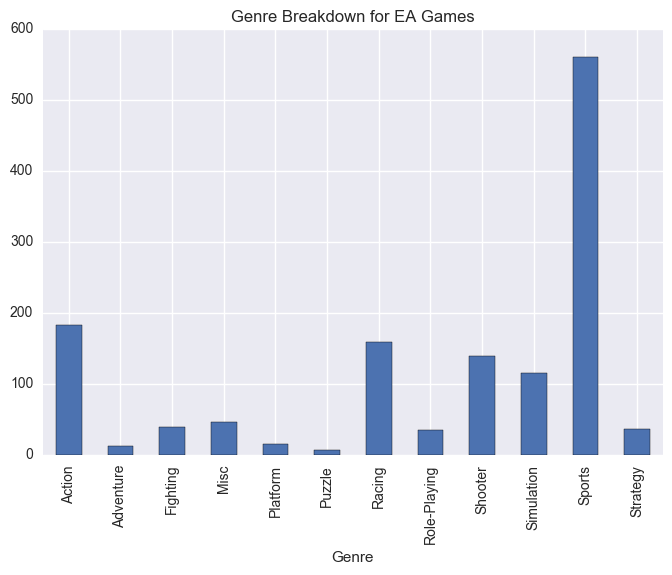

In [10]:
EA_Games = df.loc[df["Publisher"] == "Electronic Arts"]
EA_Games.groupby("Genre").count()["Rank"].plot.bar(title="Genre Breakdown for EA Games")

As mentioned above, we can see most of EA's games fall under the sports genre. Before I plotted this I eyed over the table and noted that many of the FIFA games were under the "Action" genre, so we could assume that the Sports games are even underrepresented here.

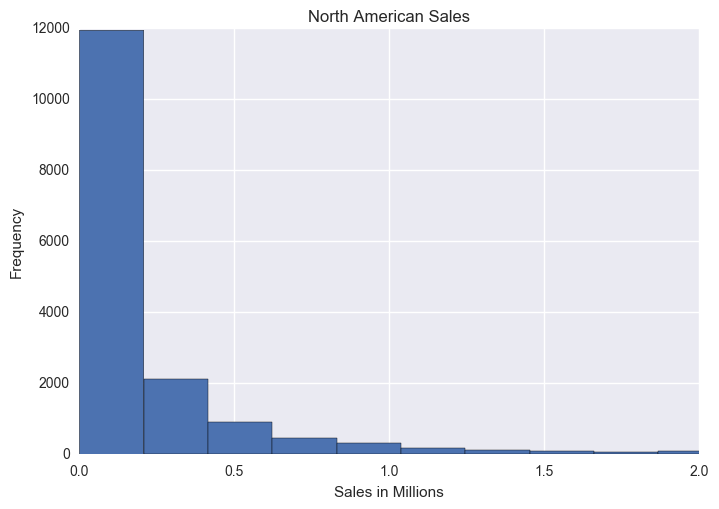

In [11]:
title="North American Sales"
df["NA_Sales"].plot.hist(bins=200, title=title, xlim=(0,2)).set_xlabel("Sales in Millions")

It looks like most NA games have fewer than 500k copies sold

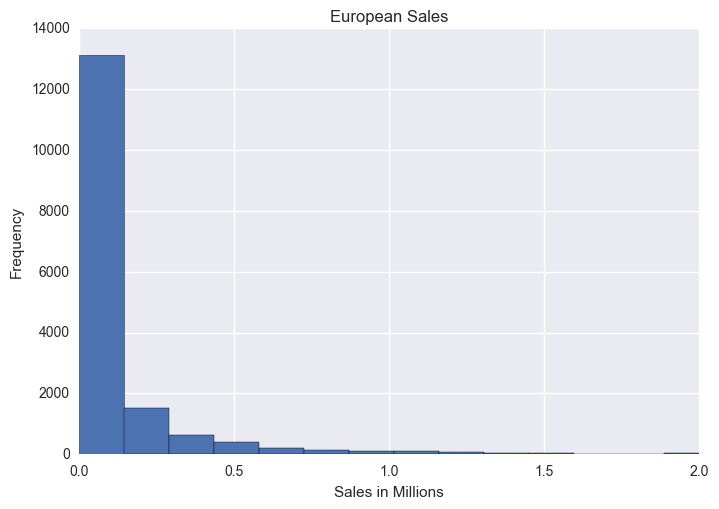

In [12]:
title="European Sales"
df["EU_Sales"].plot.hist(bins=200, title=title, xlim=(0,2)).set_xlabel("Sales in Millions")

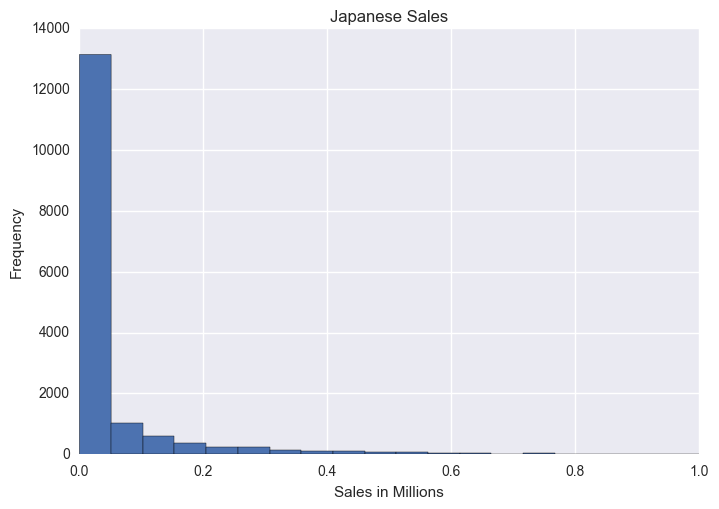

In [13]:
title="Japanese Sales"
df["JP_Sales"].plot.hist(bins=200, title=title, xlim=(0,1)).set_xlabel("Sales in Millions")

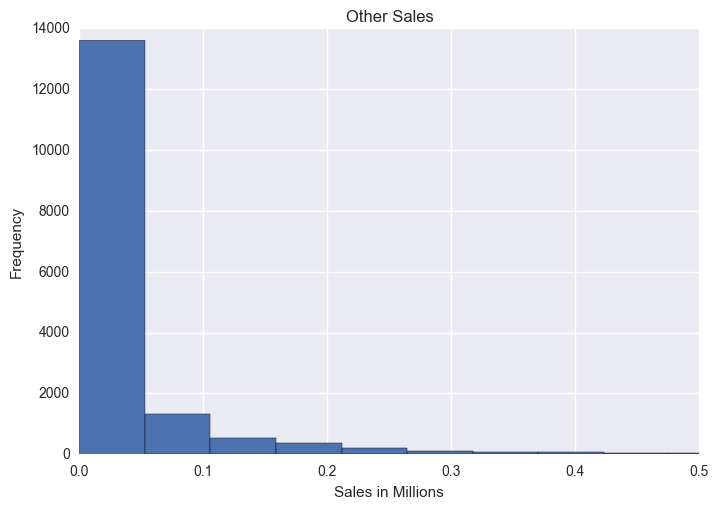

In [14]:
title="Other Sales"
df["Other_Sales"].plot.hist(bins=200, title=title, xlim=(0,0.5)).set_xlabel("Sales in Millions")

It looks like the NA market is the largest as many of the EU, JP, and Other Sales figures do not exceed the 250,000 copies sold mark

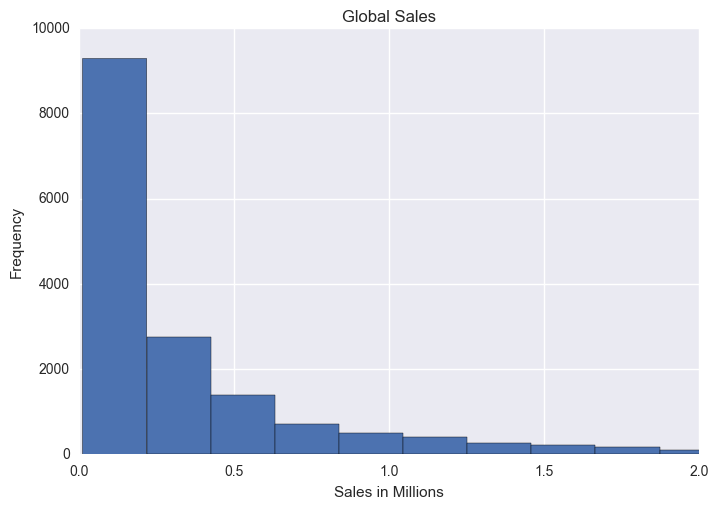

In [15]:
title="Global Sales"
df["Global_Sales"].plot.hist(bins=400, title=title, xlim=(0,2)).set_xlabel("Sales in Millions")

## Bivariate

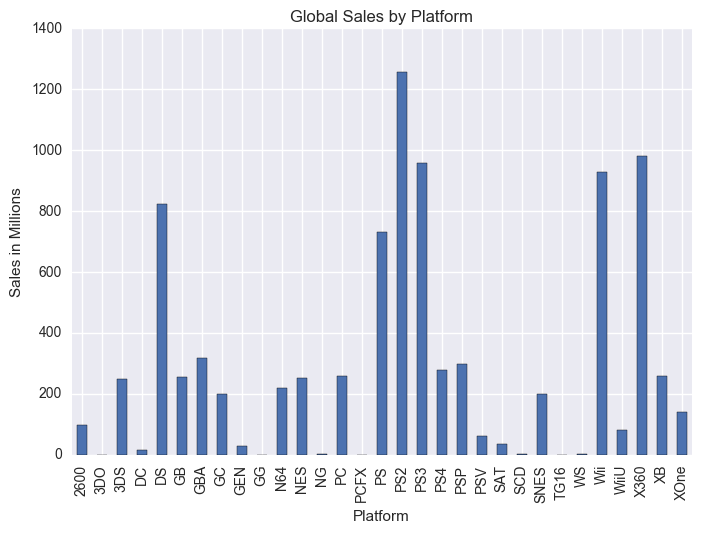

In [16]:
title = "Global Sales by Platform"
df.groupby("Platform").sum()["Global_Sales"].plot.bar(title=title).set_ylabel("Sales in Millions")

It looks like PS2 has the best selling games, where 'best selling' is the total number of sales.

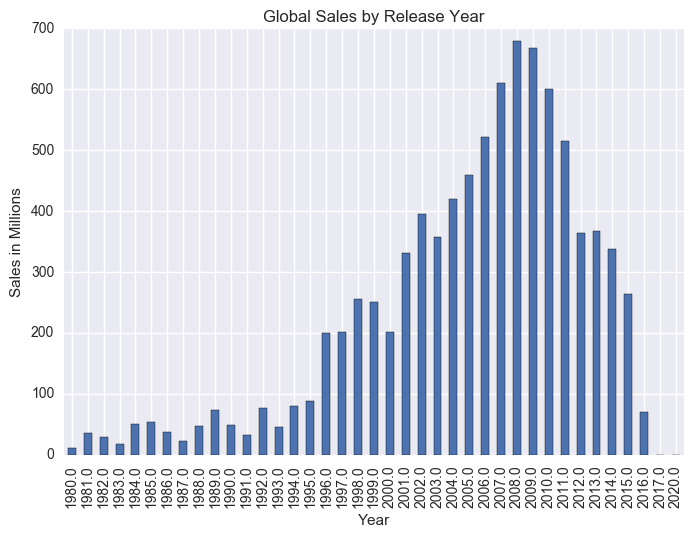

In [17]:
title = "Global Sales by Release Year"
df.groupby("Year").sum()["Global_Sales"].plot.bar(title=title).set_ylabel("Sales in Millions")

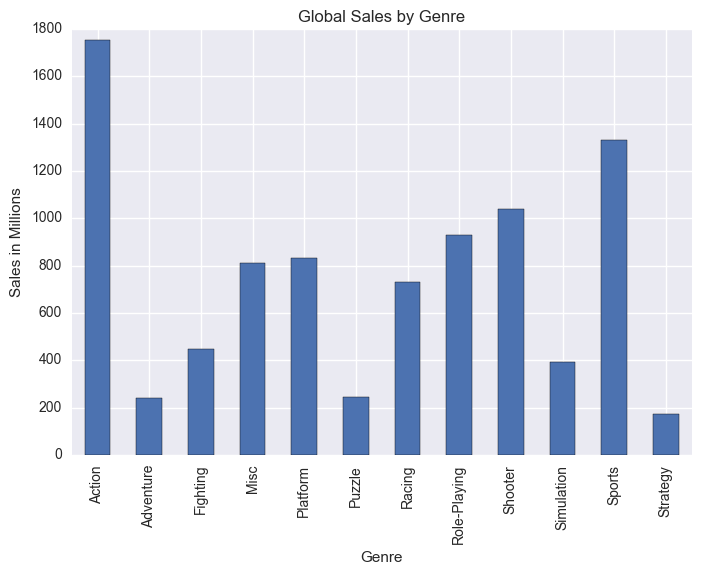

In [18]:
title = "Global Sales by Genre"
df.groupby("Genre")\
    .sum()["Global_Sales"]\
    .plot.bar(title=title)\
    .set_ylabel("Sales in Millions")

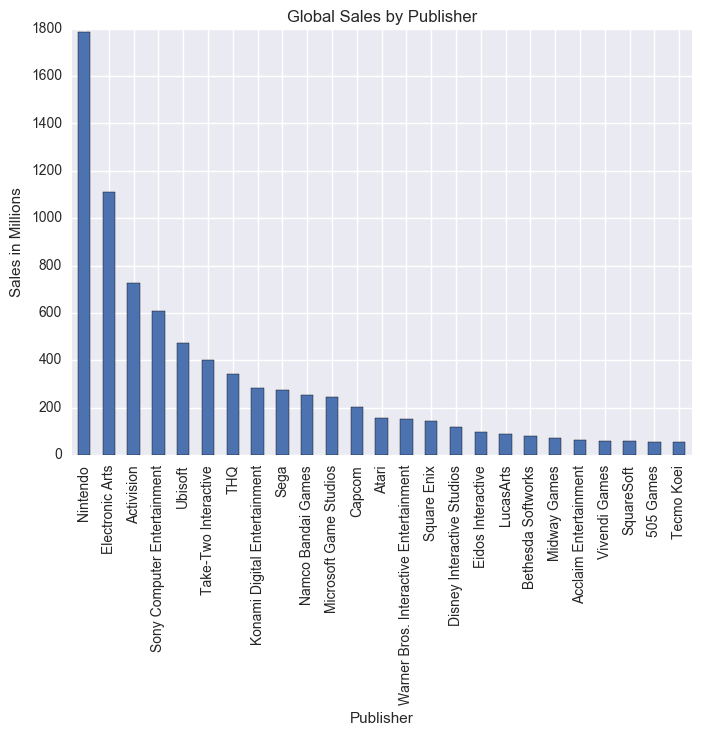

In [19]:
title = "Global Sales by Publisher"
df.groupby("Publisher")\
    .sum()\
    .sort_values(by="Global_Sales", ascending=False)\
    .head(25)["Global_Sales"]\
    .plot.bar(title=title)\
    .set_ylabel("Sales in Millions")

In [20]:
# Computing what percentage of sales Nintendo accounts for in total global sales
sales_by_publisher = df.groupby("Publisher").sum()["Global_Sales"].sort_values(ascending=False)
sales_by_publisher["Nintendo"]/sales_by_publisher.sum() * 100

20.061175265789029

In [21]:
# Computing what percentage of Games Nintendo accounts for in our set
df.loc[df.Publisher == "Nintendo", "Rank"].count()/len(df) * 100

4.2354500542234002

**Nintendo accounts for 4.24% of our games in this dataset, yet captures 20% of our total global game sales**

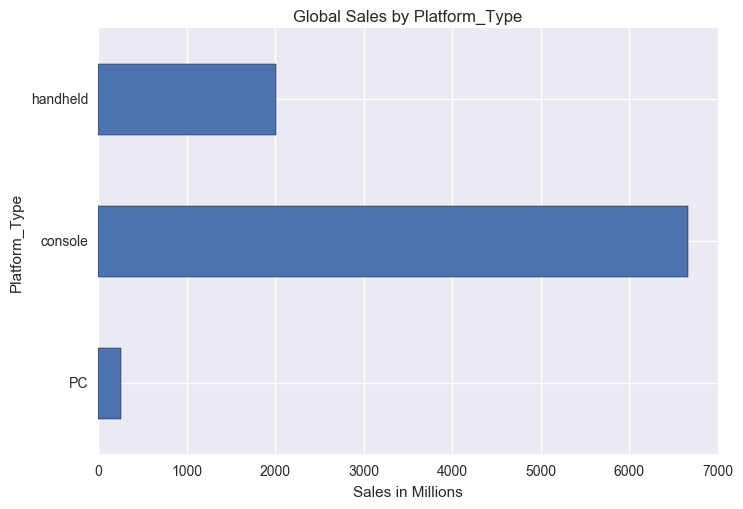

In [22]:
title="Global Sales by Platform_Type"
df.groupby("Platform_Type")\
    .sum()["Global_Sales"]\
    .plot.barh(title=title)\
    .set_xlabel("Sales in Millions")

And as we can see above, console games appear to sell the most

## Multivariate

Ideas:
- Stacked bar charts from examples above
- What are each top publishers best selling games
- What are the best selling consoles
- Why was 2008 such a good video game year?

Lets try and visualize the best selling consoles by platform type. (i.e. Which console has the most games, by platform type)

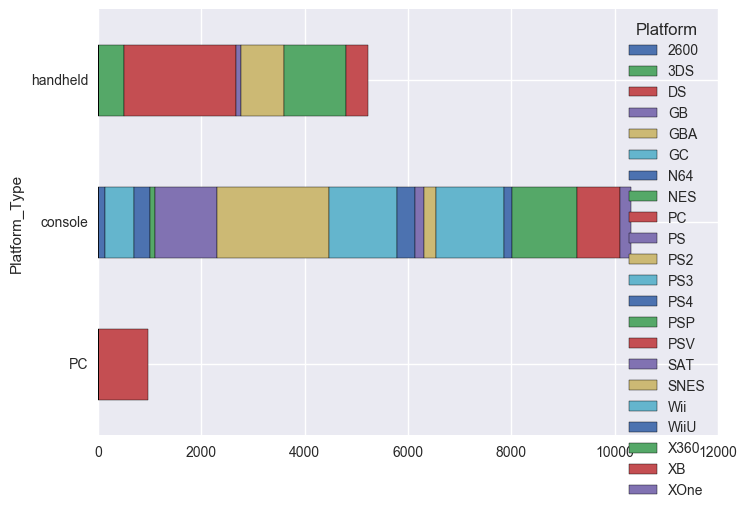

In [23]:
console_count=df.groupby("Platform").count()["Rank"]
console_count = console_count[console_count > 55]
top_consoles = df[df.Platform.isin(list(console_count.keys()))]

top_consoles.groupby(["Platform_Type", "Platform"]).count()["Global_Sales"]\
    .unstack("Platform").fillna(0)\
    .plot.barh(stacked=True)

The plot is a little messy since we have so many consoles, but if you know which consoles belong to which platform types, then you can distinguish which of the platforms is reponsible for each stack as they are alphabetized. (i.e the first mustard colored stack in console is PS2, not GBA)

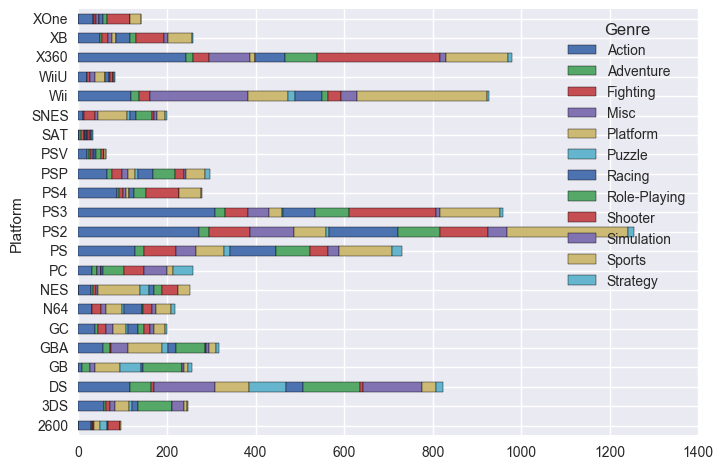

In [28]:
top_consoles\
    .groupby(["Platform", "Genre"])\
    .sum()["Global_Sales"]\
    .unstack("Genre")\
    .fillna(0)\
    .plot.barh(stacked=True)

Here are our games' genre breakdowns by platform. We can see Action and Sports games make up a lot of our PS2 games!

In [25]:
top_publishers = df.groupby("Publisher").count()["Rank"].sort_values(ascending=False).head(10)
top_publishers = df[df["Publisher"].isin(top_publishers.keys())]

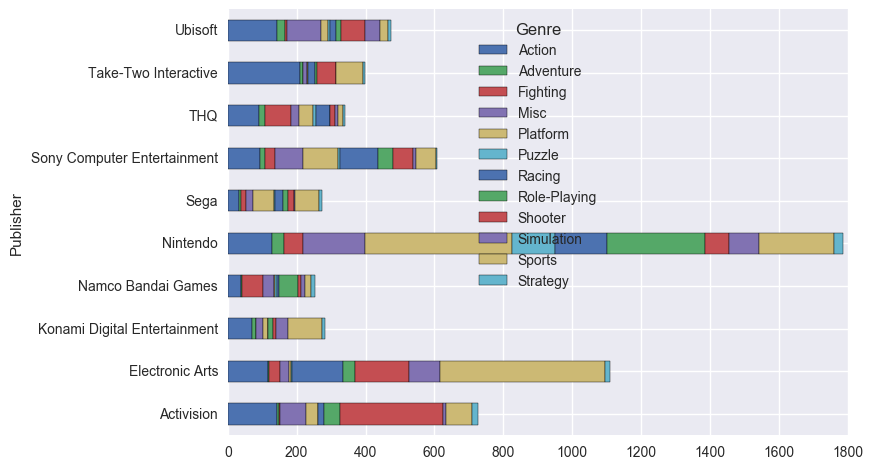

In [29]:
top_publishers.groupby(["Publisher", "Genre"])\
    .sum()["Global_Sales"]\
    .unstack("Genre")\
    .fillna(0)\
    .plot.barh(stacked=True)

Again while our plot is difficult to read, we can see a lot of good information here. These stacked bars are not based off game counts but rather Global Sales. If a publisher has a large stack, we can infer that the Publisher is known for that genre of game; for example Nintendo has a large mustard colored stack, indicating it sells a lot of Platform games.

Electronic Arts has a second large mustard stack indicating it sells a lot of Sports games.

Next lets look at best selling platforms by Publisher

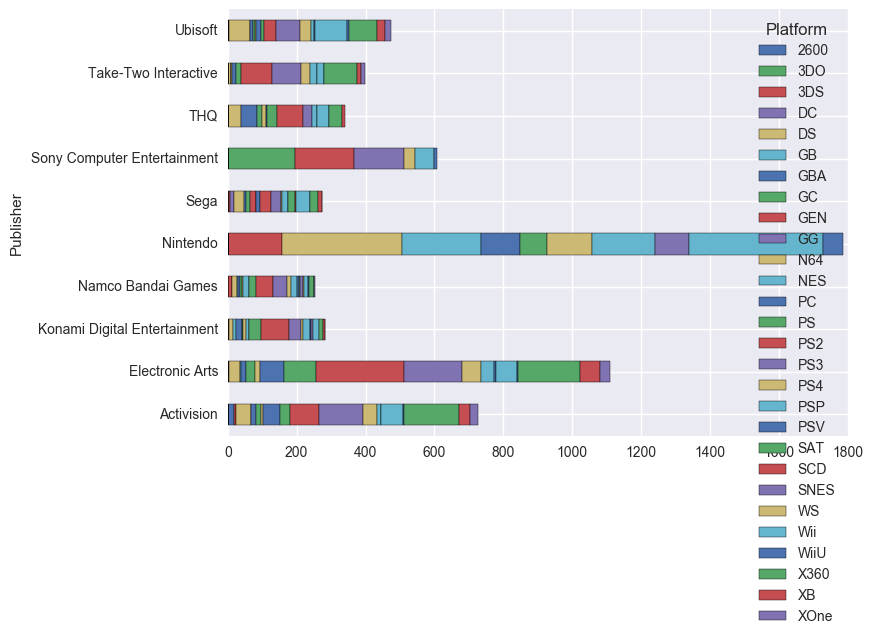

In [30]:
top_publishers.groupby(["Publisher", "Platform"])\
    .sum()["Global_Sales"]\
    .unstack("Platform")\
    .fillna(0)\
    .plot.barh(stacked=True)

Another busy plot but if you have some gaming platform knowledge this isn't to difficult to decipher. Sony does not release games for Nintendo platforms and vice-versa. We can see Sony sells about an equal amount of games for their PlayStation, PS2, and PS3! While Nintendo has had a lot of success with the DS and the Wii.

In [41]:
tp = top_publishers.groupby("Publisher")["Global_Sales"]

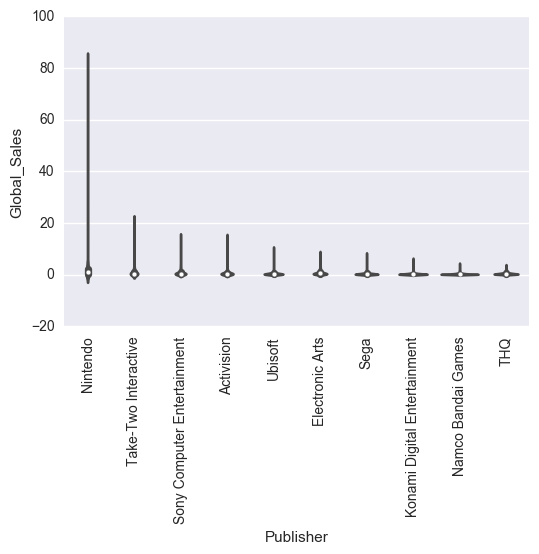

In [75]:
sns.violinplot(x=top_publishers["Publisher"], y=top_publishers["Global_Sales"])\
    .set_xticklabels(top_publishers["Publisher"].unique(), rotation = "vertical")